In [8]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from collections import Counter

import matplotlib.pyplot as plt

In [9]:
centers = [[0,0,0], [-2, -2, 0], [2, 2,1], [1,3,2]] # Number of blobs

Y, labels_true = make_blobs(
    n_samples=750, n_features=3, centers=centers, cluster_std=0.4, random_state=0
)
Y = StandardScaler().fit_transform(Y)

In [10]:
#change eps (epsilon) to desired value

db = DBSCAN(eps=0.3, min_samples=10).fit(Y)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

In [11]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

<class 'numpy.ndarray'>


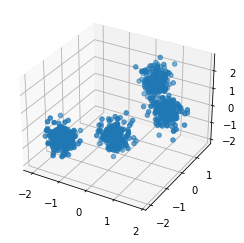

In [12]:
## unclustered data

fig = plt.figure()
ax = plt.axes(projection='3d')
print(type(Y))
ax.scatter3D(
    Y[:,0],
    Y[:,1],
    Y[:,2]
)

In [13]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


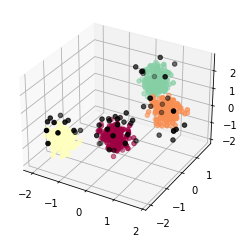

In [14]:
## clustered data
fig = plt.figure()
ax = plt.axes(projection='3d')

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xyz = Y[class_member_mask & core_samples_mask]
    ax.scatter3D(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        color=tuple(col)
    )

    xyz = Y[class_member_mask & ~core_samples_mask]
    ax.scatter3D(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        color=tuple(col)
    )

plt.show()